# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1Q43AkxxDy4g-zl5lIX4_PBJtTguh4Ise)

![alt text](https://drive.google.com/uc?id=1uS6vsccMt3koetsp3k9cAIfbpJw7Z1J8)

![alt text](https://drive.google.com/uc?id=1r1FjdO8duujUoI904Oy4vbza6KktxSXo)

![alt text](https://drive.google.com/uc?id=1vMr3ouoZ6Pc1mba1mBm2eovlJ3tfE6JA)

![alt text](https://drive.google.com/uc?id=1VvqzWWY8wFGeP4cl-rVtWVOg1P6saHfZ)

![alt text](https://drive.google.com/uc?id=1LpdL0-4E9lbc4s-x6eJ5zkyIVw_OpHuJ)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv('/content/drive/My Drive/Python+for+Financial+Analysis+-+Course+Package/Part 3. AI and ML in Finance/4. Marketing_data.csv')
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [5]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [9]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [10]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TASK #3: VISUALIZE AND EXPLORE DATASET

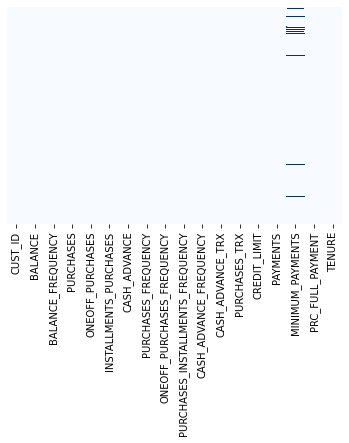

In [11]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [12]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [14]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

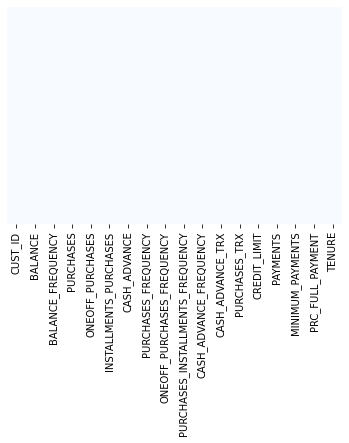

In [15]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [16]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [17]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [18]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
n = len(creditcard_df.columns)
n

17

In [20]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

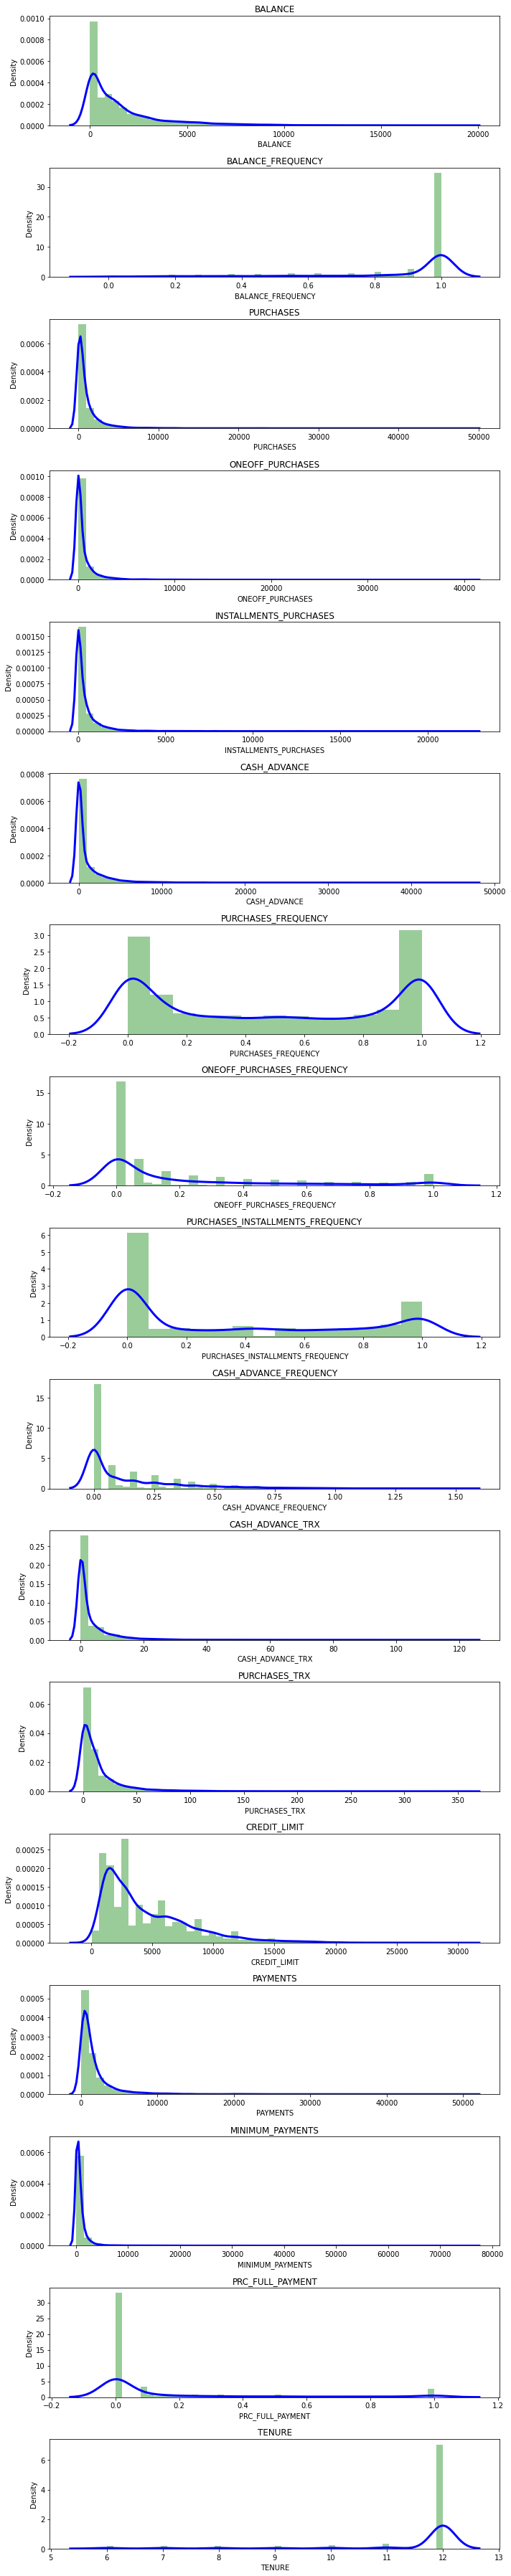

In [21]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [ ]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'


In [22]:
correlations = creditcard_df.corr()

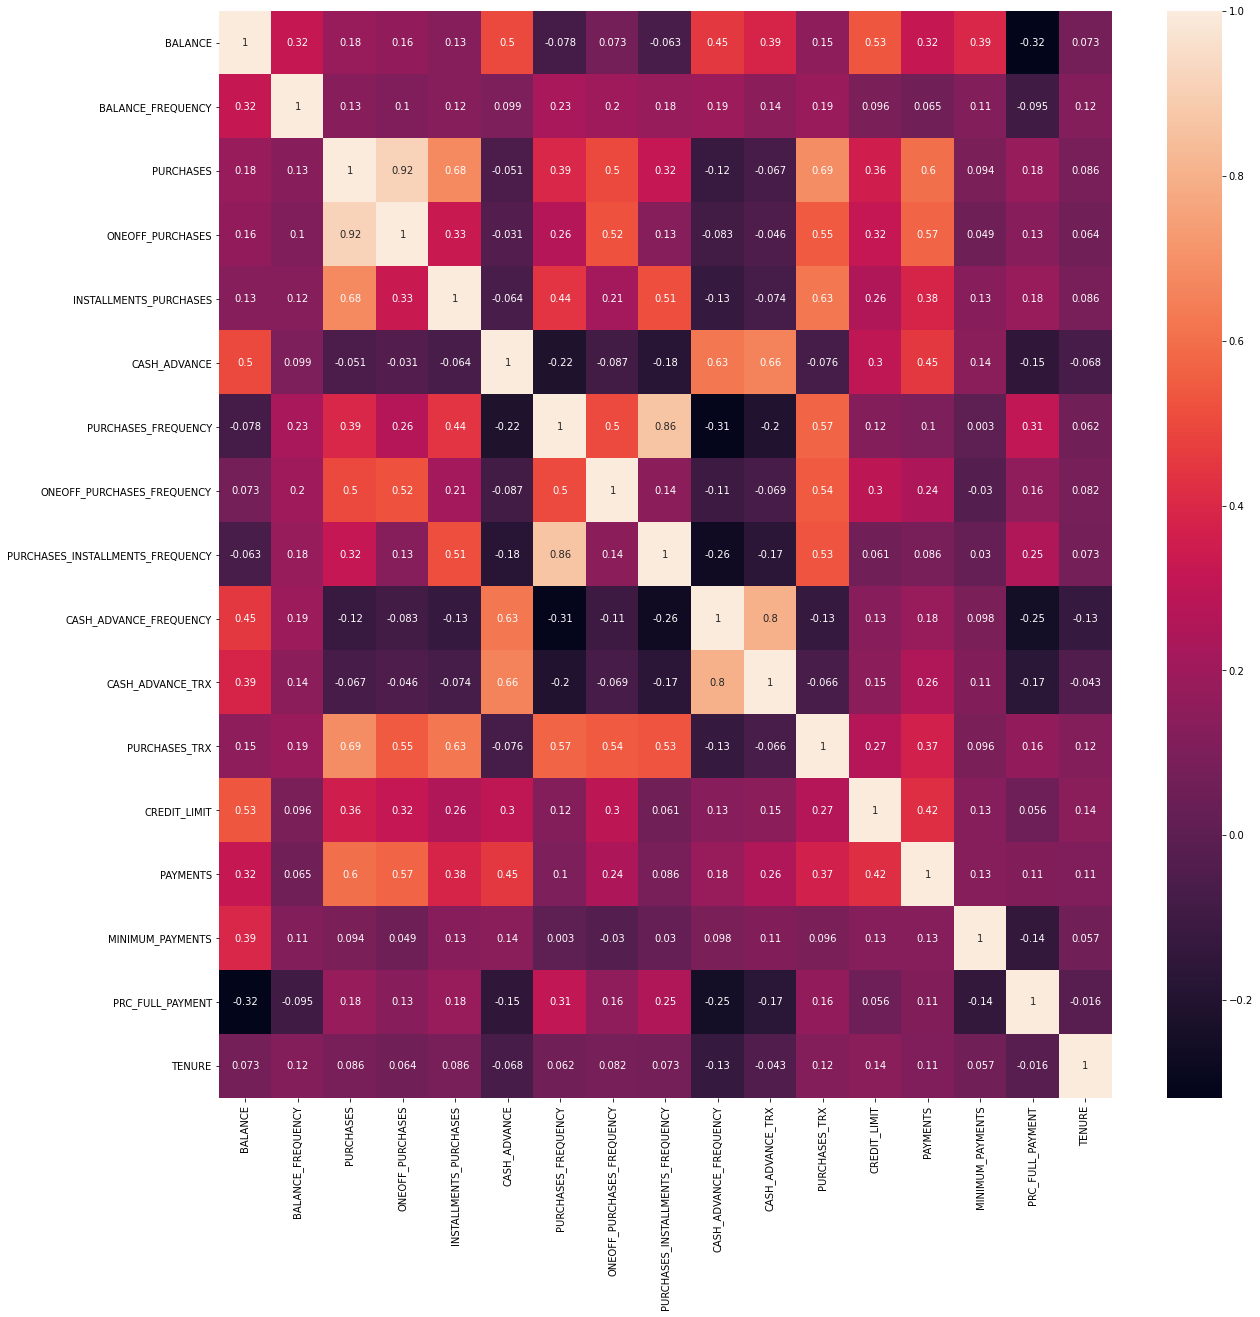

In [23]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

![alt text](https://drive.google.com/uc?id=1EBCmP06GuRjVfPgTfH85Yhv9xIAZUj-K)

![alt text](https://drive.google.com/uc?id=1EYWyoec9Be9pYkOaJTjPooTPWgRlJ_Xz)

![alt text](https://drive.google.com/uc?id=1ppL-slQPatrmHbPBEaT3-8xNH01ckoNE)

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)

![alt text](https://drive.google.com/uc?id=1bLRDIZRda0NSTAdcbugasIjDjvgw4JIU)

![alt text](https://drive.google.com/uc?id=1rBQziDU0pS1Fz0m8VQRjQuBoGFSX1Spb)

![alt text](https://drive.google.com/uc?id=1BOX2q8R_8E4Icb4v1tpn1eymCTJY2b5o)

![alt text](https://drive.google.com/uc?id=1v7hJEPiigSeTTaYo0djbO-L4uEnTpcAU)

# TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [24]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [25]:
creditcard_df_scaled.shape

(8950, 17)

In [26]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

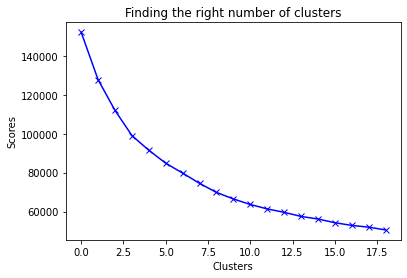

In [27]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

# TASK #6: APPLY K-MEANS METHOD

In [28]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [29]:
kmeans.cluster_centers_.shape

(8, 17)

In [30]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers         

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.380465,0.330129,-0.038308,-0.230746,0.333177,-0.367443,0.983366,-0.348401,1.174106,-0.476244,-0.361720,0.171050,-0.272903,-0.222046,-0.110056,0.317777,0.251507
1,-0.334843,-0.343573,-0.284231,-0.208737,-0.288211,0.065686,-0.197106,-0.271926,-0.229662,0.304677,-0.001695,-0.385258,-0.557568,-0.390390,-0.209717,0.013756,-3.194665
2,-0.000358,0.401211,-0.341752,-0.222480,-0.399224,-0.112810,-0.805767,-0.332292,-0.750977,0.073078,-0.049632,-0.463570,-0.304274,-0.249749,-0.064955,-0.452520,0.272550
3,0.140610,0.430553,0.952719,0.904791,0.590418,-0.307427,1.097469,1.881024,0.539846,-0.407957,-0.317187,1.211354,0.713158,0.396111,-0.050921,0.461783,0.307220
4,-0.701644,-2.135105,-0.307095,-0.230794,-0.301997,-0.322829,-0.547671,-0.429290,-0.440970,-0.521852,-0.376776,-0.416512,-0.172638,-0.201737,-0.257131,0.294581,0.199658
5,1.374491,0.412070,7.177493,6.384202,5.239545,0.016050,1.082454,1.917512,1.031769,-0.290144,-0.107898,4.786628,2.181050,4.962364,0.709040,0.864673,0.332658
6,1.629287,0.392897,-0.206262,-0.148444,-0.215068,1.991180,-0.458818,-0.185444,-0.408353,1.925124,1.923863,-0.239995,0.998132,0.829640,0.368132,-0.388946,0.070086
7,1.135598,0.469242,-0.074806,-0.296769,0.367637,-0.042415,-0.071366,-0.559998,0.167464,-0.152910,-0.047119,0.078970,-0.095920,-0.076995,9.436581,-0.520371,0.292749


In [31]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,772.569185,0.955475,921.359743,209.445612,712.355039,208.325013,0.885023,0.098523,0.831057,0.039843,0.780355,18.961500,3501.515401,1090.342206,607.726555,0.246659,11.853899
1,867.527490,0.795881,395.941226,245.976624,150.442309,1116.616899,0.411243,0.121337,0.273164,0.196113,3.237261,5.133758,2465.787340,603.004456,375.470865,0.157738,7.242038
2,1563.729822,0.972314,273.045638,223.166895,50.054544,742.303229,0.166957,0.103328,0.065980,0.149768,2.910124,3.187211,3387.377146,1010.144672,712.831442,0.021360,11.882060
3,1857.143114,0.979265,3038.704205,2094.205723,944.975429,334.183296,0.930818,0.763604,0.578986,0.053508,1.084261,44.819555,7089.210869,2879.845130,745.537412,0.288778,11.928458
4,104.062987,0.371484,347.091953,209.366675,137.975109,301.884228,0.270544,0.074392,0.189185,0.030716,0.677609,4.356902,3866.321081,1149.133904,264.973227,0.239875,11.784512
5,4425.362379,0.974886,16338.028250,11188.905375,5149.122875,1012.529590,0.924792,0.774489,0.774489,0.077083,2.512500,133.687500,12430.000000,16098.700812,2516.595215,0.406617,11.962500
6,4955.698967,0.970344,562.522878,346.051422,216.584422,5154.468553,0.306205,0.147136,0.202147,0.520381,16.377778,8.744444,8126.060606,4134.871092,1722.121784,0.039955,11.611111
7,3928.125451,0.988430,843.379636,99.862000,743.517636,889.924775,0.461708,0.035399,0.430992,0.104545,2.927273,16.672727,4145.454545,1510.251238,22855.761083,0.001515,11.909091


In [32]:
labels.shape # Labels associated to each data point

(8950,)

In [33]:
labels.max()

7

In [34]:
labels.min()

0

In [35]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([2, 7, 1, ..., 5, 5, 5], dtype=int32)

In [36]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


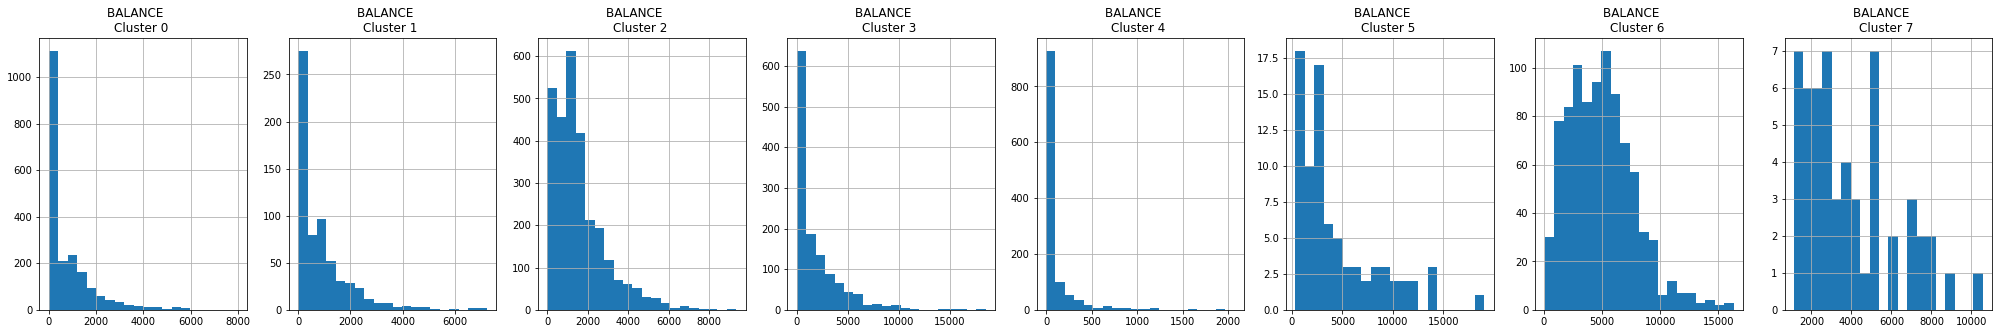

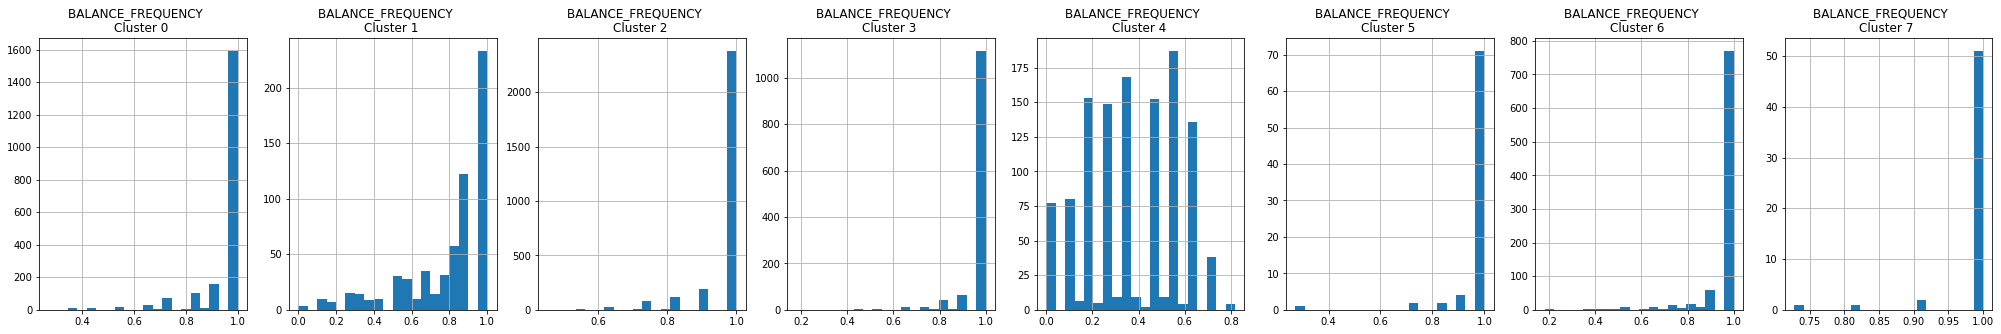

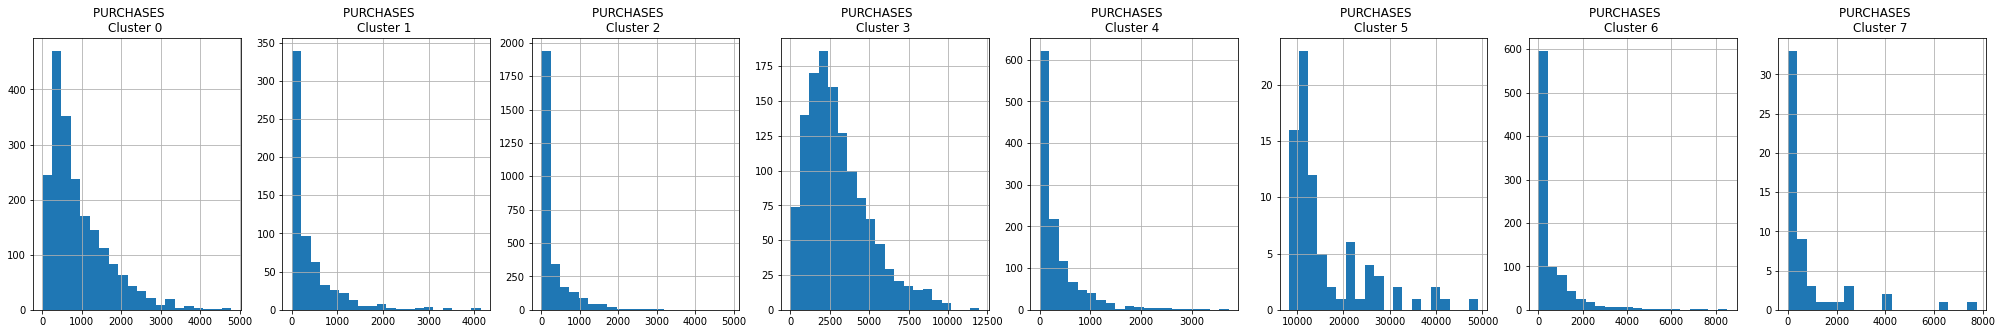

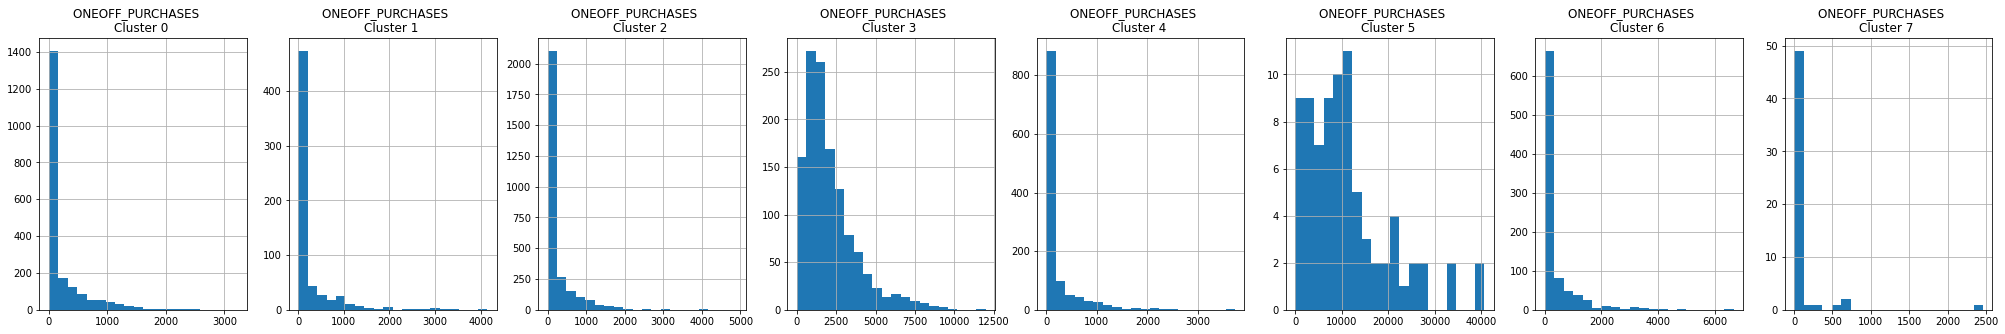

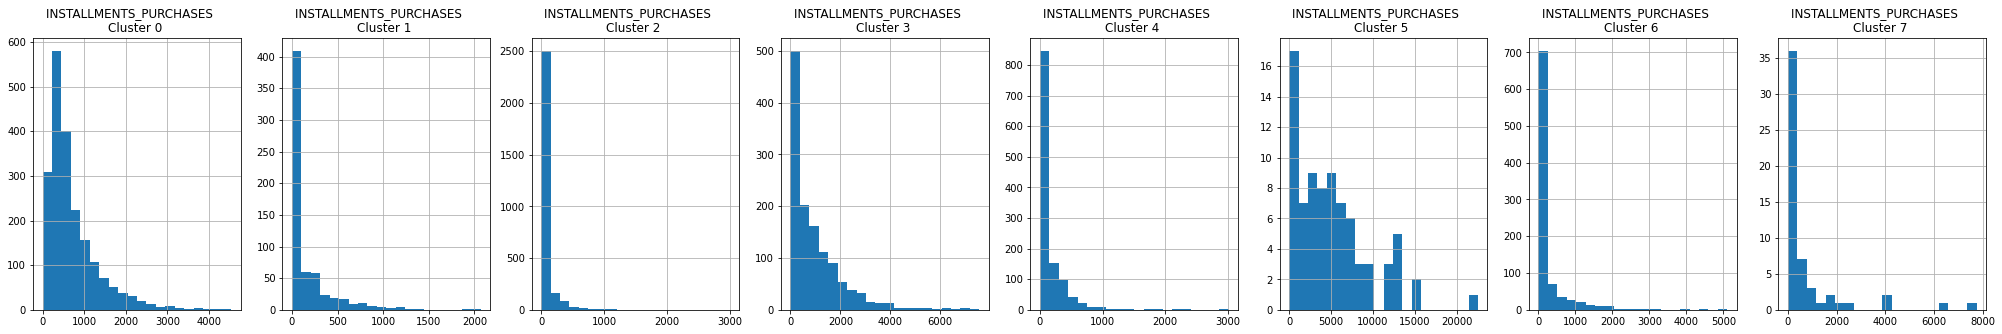

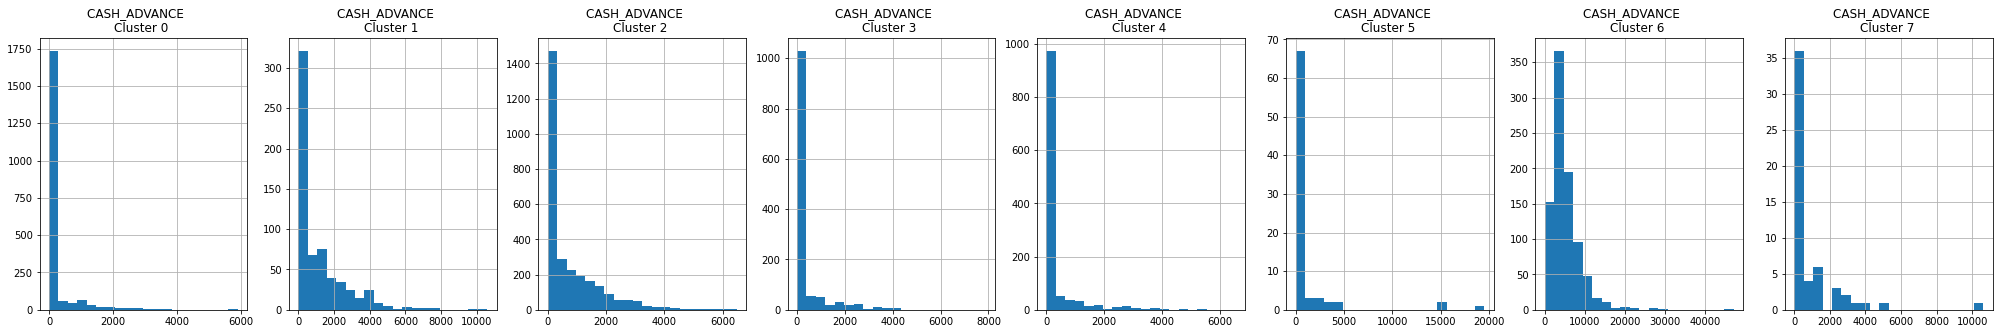

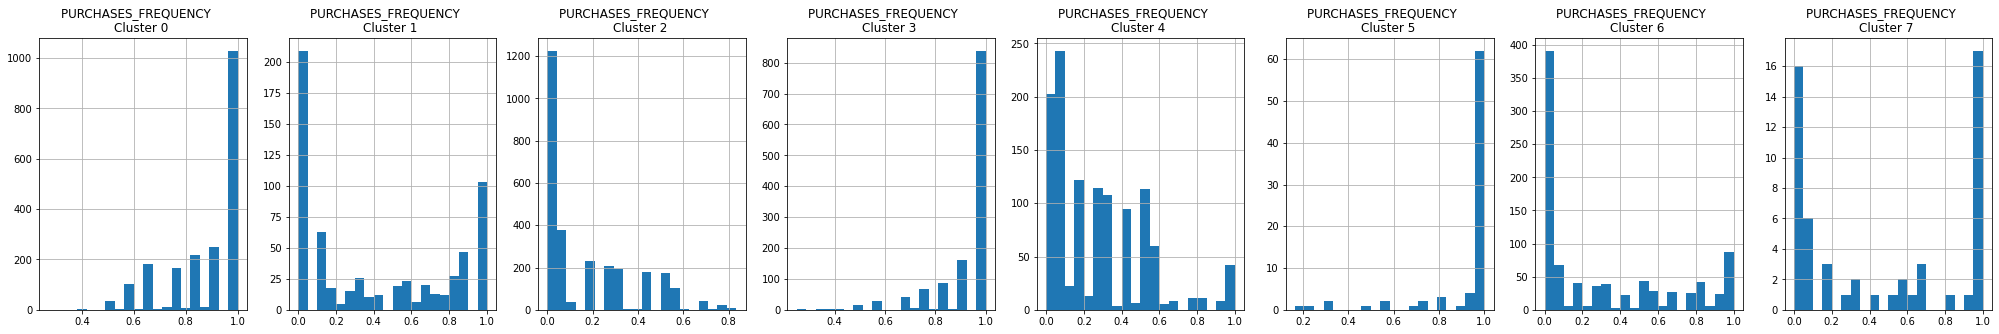

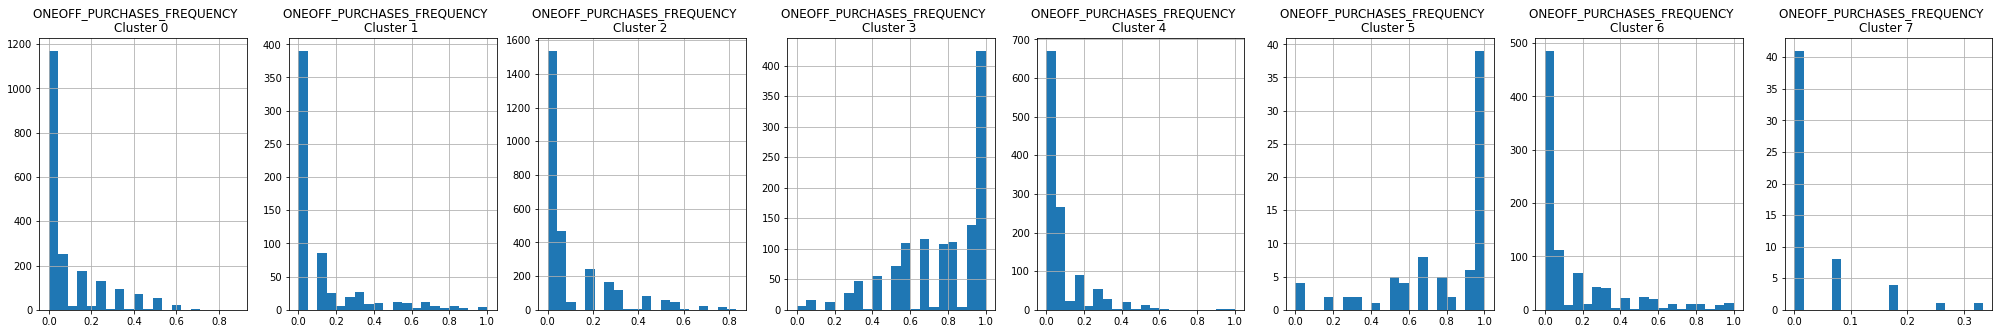

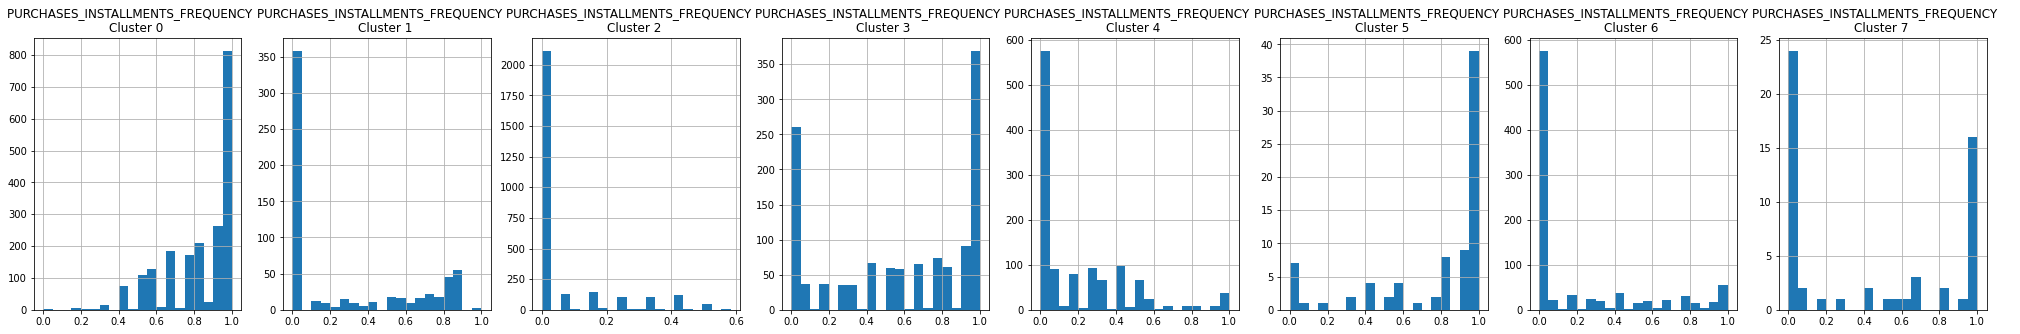

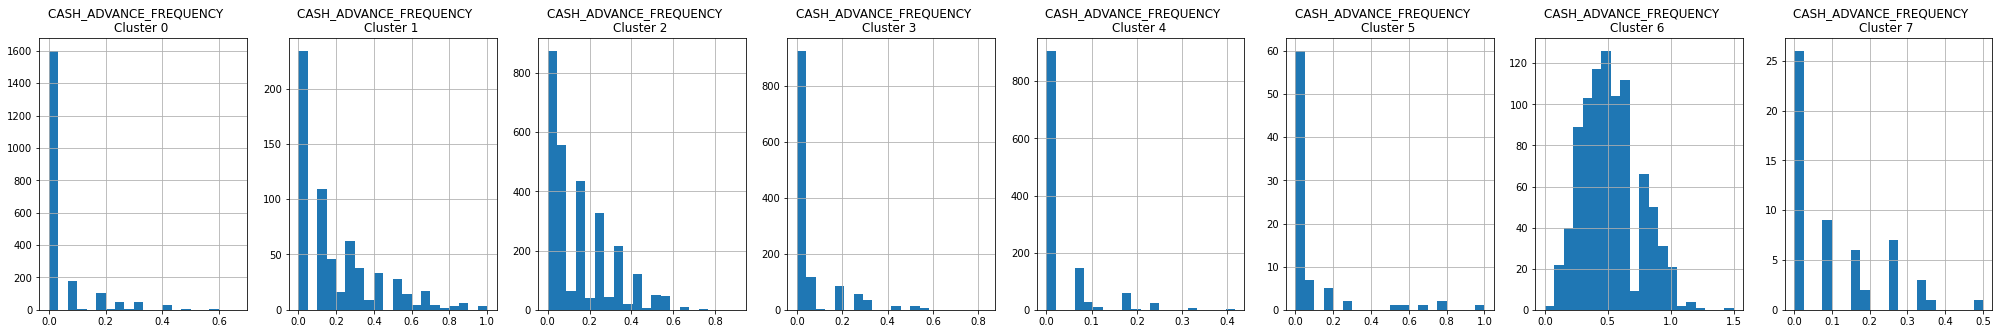

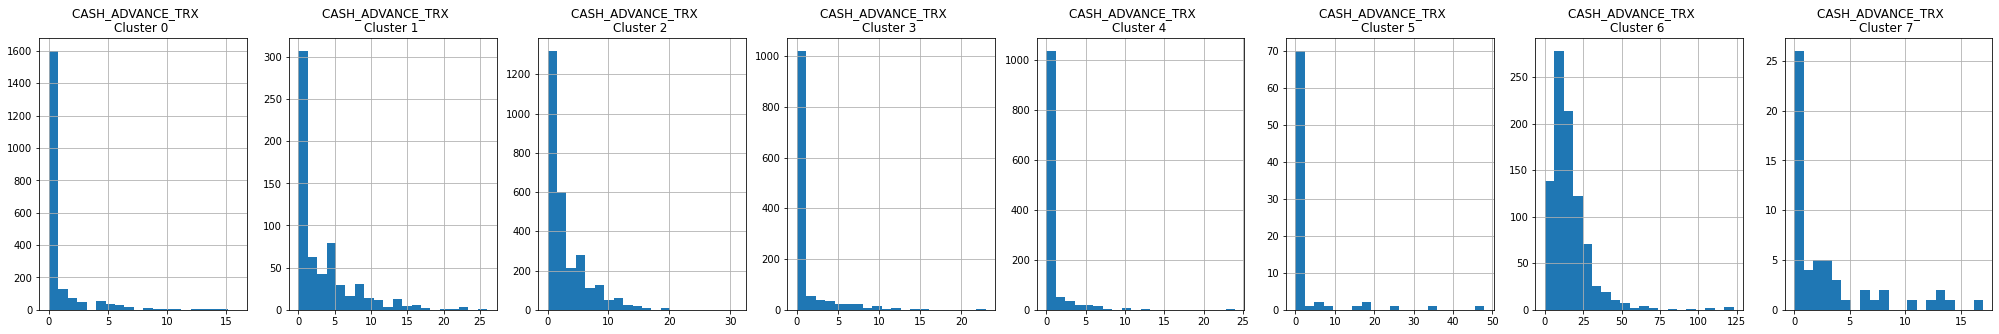

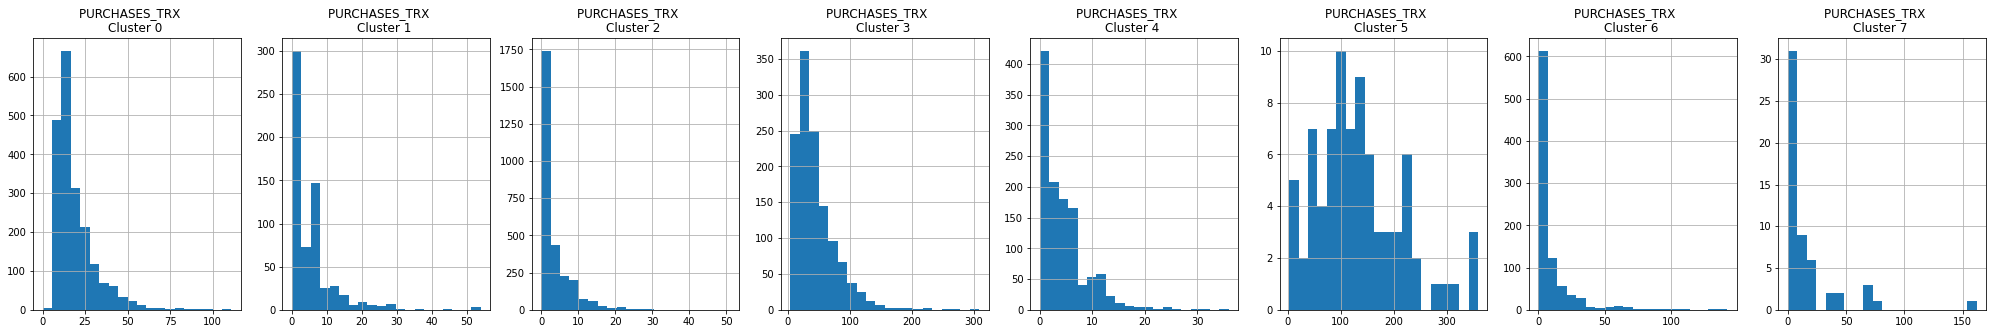

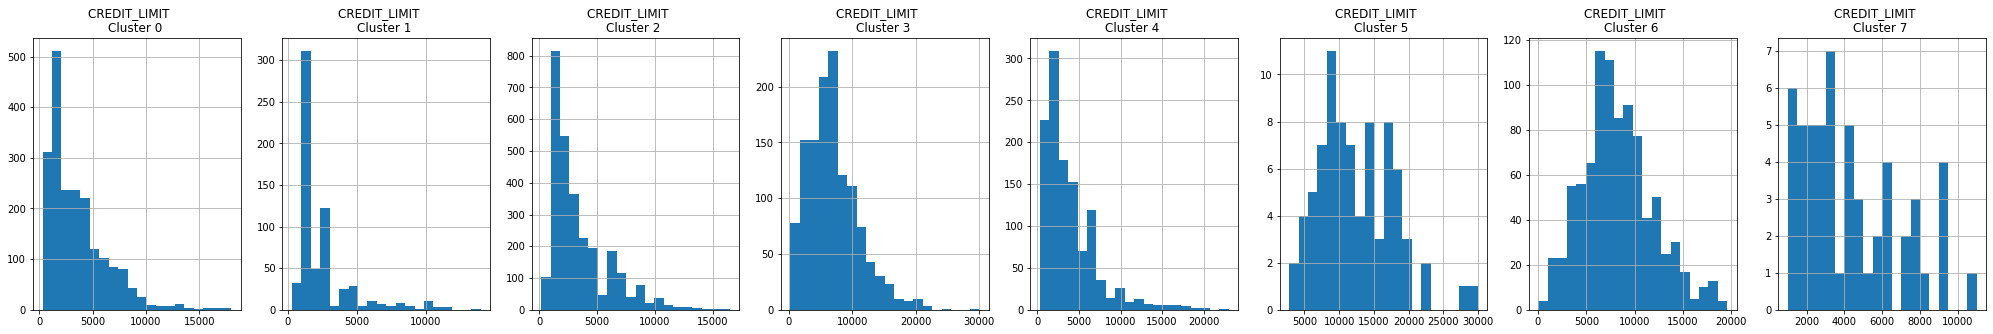

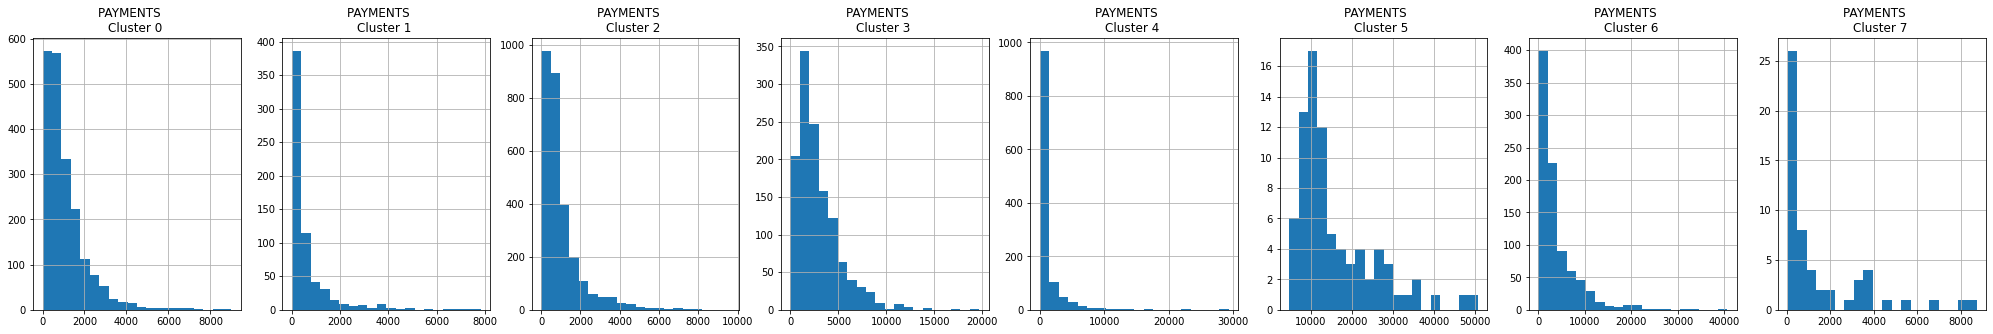

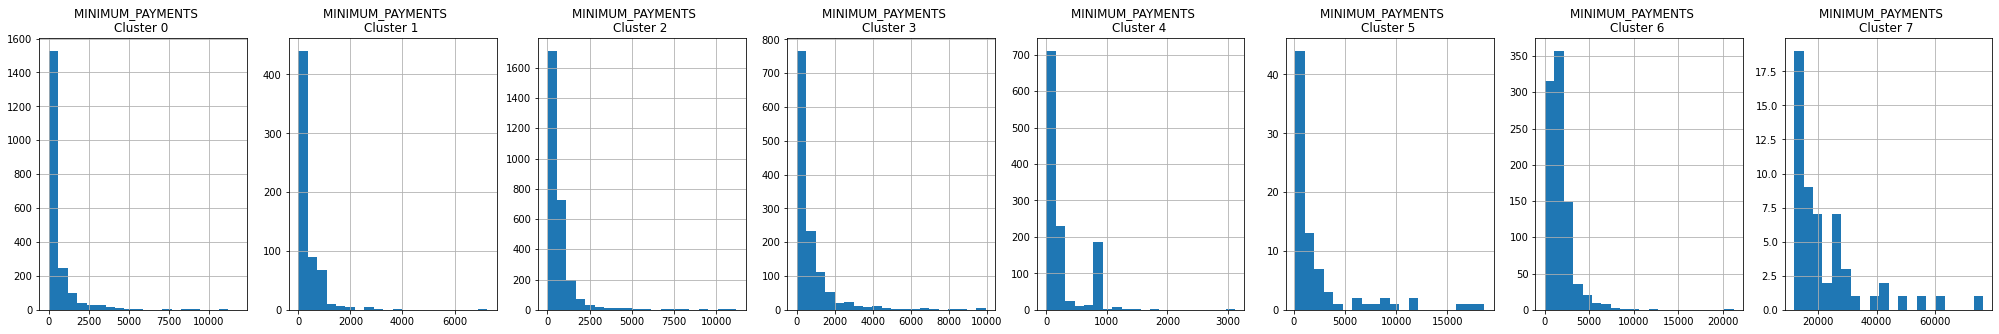

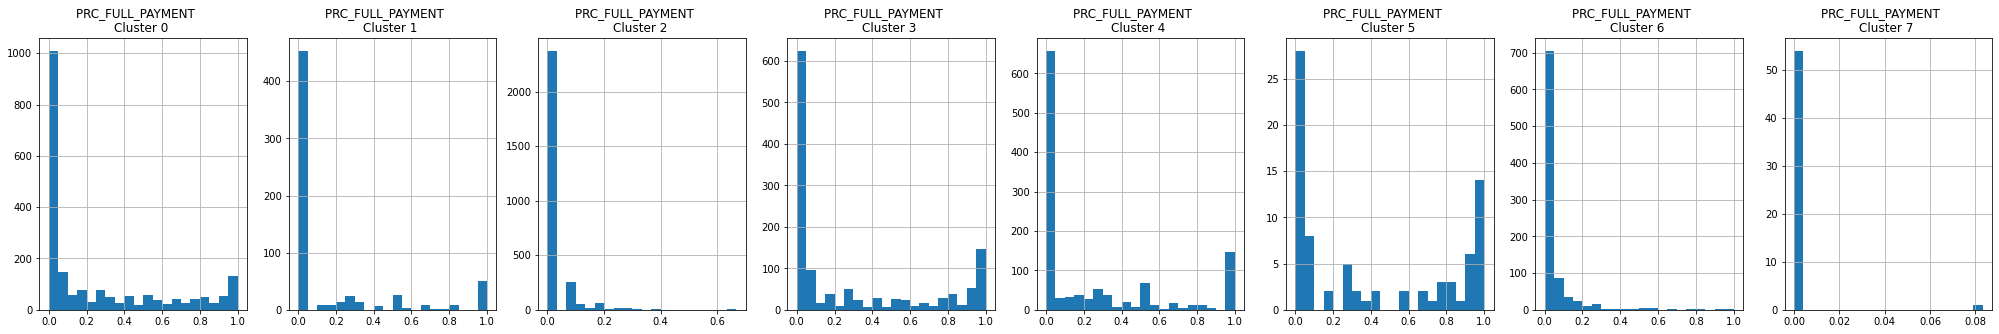

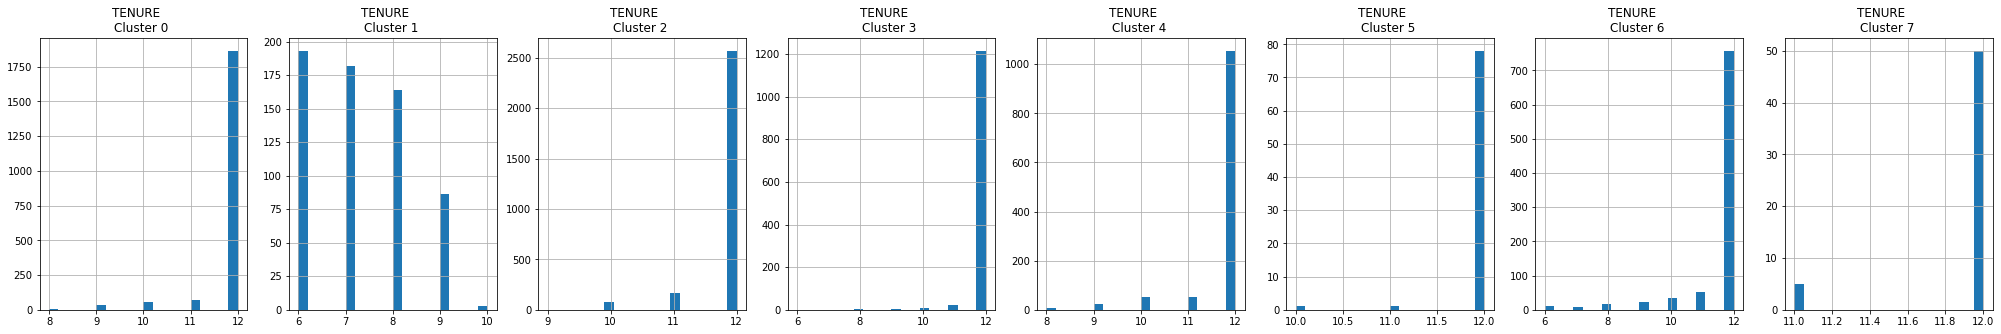

In [37]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [38]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222148, -1.07645322],
       [-1.1382973 ,  2.50647348],
       [ 0.96968844, -0.38351509],
       ...,
       [-0.9262046 , -1.81078834],
       [-2.33655342, -0.65796855],
       [-0.55641956, -0.40046084]])

In [39]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076453
1,-1.138297,2.506473
2,0.969688,-0.383515
3,-0.873630,0.043162
4,-1.599434,-0.688583


In [40]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076453,2
1,-1.138297,2.506473,6
2,0.969688,-0.383515,3
3,-0.873630,0.043162,2
4,-1.599434,-0.688583,2


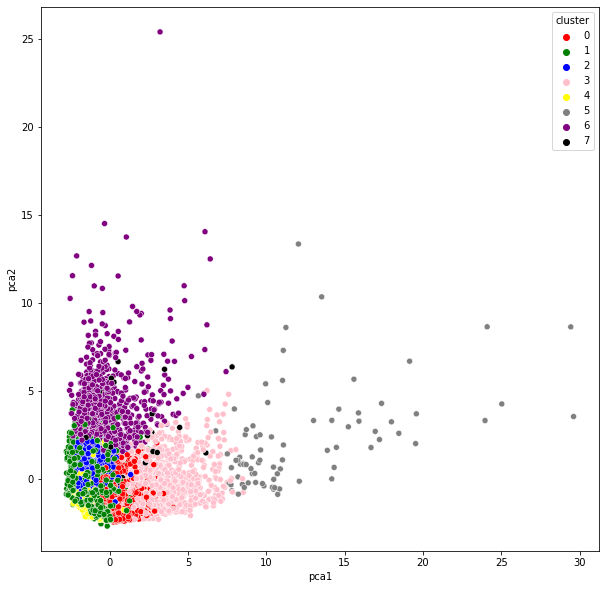

In [41]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [42]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [43]:
creditcard_df_scaled.shape

(8950, 17)

In [44]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 4s 54ms/step - loss: 0.4878
Epoch 2/25
70/70 [==============================] - 4s 55ms/step - loss: 0.2613
Epoch 3/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1996
Epoch 4/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1694
Epoch 5/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1389
Epoch 6/25
70/70 [==============================] - 4s 55ms/step - loss: 0.1240
Epoch 7/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1182
Epoch 8/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1032
Epoch 9/25
70/70 [==============================] - 4s 53ms/step - loss: 0.0931
Epoch 10/25
70/70 [==============================] - 4s 54ms/step - loss: 0.0833
Epoch 11/25
70/70 [==============================] - 4s 55ms/step - loss: 0.0868
Epoch 12/25
70/70 [==============================] - 4s 55ms/step - loss: 0.0781
Epoch 13/25
70/70 [==================

In [45]:
autoencoder.save_weights('autoencoder.h5')

In [46]:
pred = encoder.predict(creditcard_df_scaled)

In [47]:
pred.shape

(8950, 10)

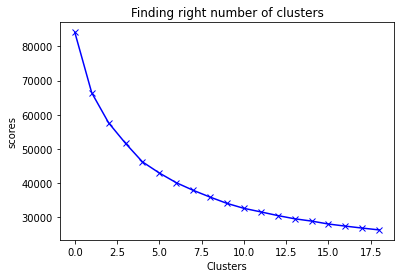

In [48]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

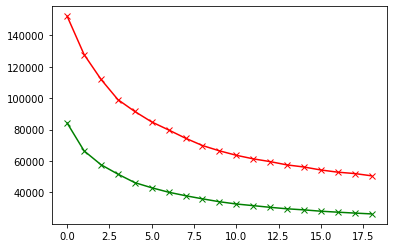

In [49]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [50]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [51]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [52]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.532410,-0.078803
1,1.086754,-2.153774
2,-1.182813,1.031236
3,0.856198,-0.480804
4,-1.798873,-0.050915


In [53]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.532410,-0.078803,0
1,1.086754,-2.153774,2
2,-1.182813,1.031236,0
3,0.856198,-0.480804,1
4,-1.798873,-0.050915,0


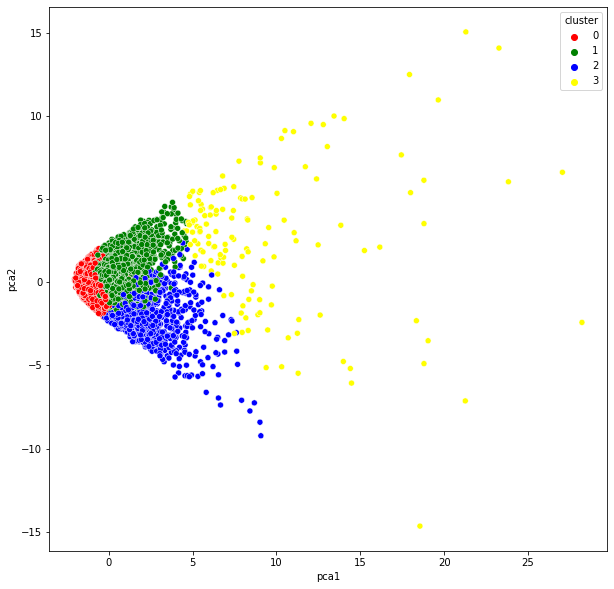

In [54]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS